In [6]:
%load_ext autoreload
# Always reload modules so that as you change code in src, it gets loaded
%autoreload 2
%matplotlib inline

import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import pandas as pd
import numpy as np
import random
import math
import EoN
import seaborn as sns
import time

# New Imports
#from ctrace.contact_tracing import *
#from ctrace.constraint import *
#from ctrace.solve import *
#from ctrace.simulation import *
#from ctrace.restricted import *
from ctrace.simulation import *
from ctrace.dataset import *
from ctrace.recommender import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
G = load_graph("montgomery")
print(G.size())

G_node = len(G.nodes)

648667


In [6]:
I = set()
#with open(PROJECT_ROOT / "data" / "SIR_Cache" / "t7.json", 'r') as infile:
    
#    j = json.load(infile)
    #(S, infected_queue, R) = (j["S"], j["I_Queue"], j["R"])

    # Make infected_queue a list of sets
    #infected_queue = [set(s) for s in infected_queue]
    #I = I.union(*infected_queue)
    #I = list(I)

infected_size = 1000

nodeList = list(G.nodes)

I = {nodeList.index(random.randint(0, G_node-1)) for i in range(0, infected_size)}
S = set(G.nodes) - I

I_q = {nodeList.index(random.randint(0, G_node-1)) for i in range(0, infected_size)}
S_q = set(G.nodes) - I_q

In [7]:
state = SimulationState(G, (list(S), list(I), []), (list(S), list(I), []), 2000, 1, 1, 0, .8, .8)

In [8]:
#to_quarantine = DegGreedy(state)
#state.step(to_quarantine)
state.step(set())

V1_k = state.SIR_known.V1
V1_r = state.SIR_real.V1

V2_k = state.SIR_known.V2
V2_r = state.SIR_real.V2

I_k = set(state.SIR_known.SIR.I)
I_r = set(state.SIR_real.SIR.I)

print("No Quarantine Graph First Run")
print("--Intersection-----Union---")
print("V1:   " + str(len(V1_k.intersection(V1_r))) + "\t" + str(len(V1_k.union(V1_r))))
print("V2:   " + str(len(V2_k.intersection(V2_r))) + "\t" + str(len(V2_k.union(V2_r))))
print("I:   " + str(len(I_k.intersection(I_r)))+ "\t" + str(len(I_k.union(I_r))))
print("-----Ratio------")
print("V1:   " + str(len(V1_k.intersection(V1_r))/len(V1_k.union(V1_r))))
print("V2:   " + str(len(V2_k.intersection(V2_r))/len(V2_k.union(V2_r))))
print("I:   " + str(len(I_k.intersection(I_r))/len(I_k.union(I_r))))
print("---Known Size----Real Size---")
print("V1:   " + str(len(V1_k)) + "\t" + str(len(V1_r)))
print("V2:   " + str(len(V2_k)) + "\t" + str(len(V2_r)))
print("I:   " + str(len(I_k)) + "\t" + str(len(I_r)))

No Quarantine Graph First Run
--Intersection-----Union---
V1:   30354	43203
V2:   11378	24650
I:   11453	14330
-----Ratio------
V1:   0.7025900979098674
V2:   0.4615821501014199
I:   0.7992323796231682
---Known Size----Real Size---
V1:   32602	40955
V2:   21951	14077
I:   11453	14330


In [9]:
state_q = SimulationState(G, (list(S_q), list(I_q), []), (list(S_q), list(I_q), []), 2000, 1, 1, 0, .8, .8)
to_quarantine = DepRound(state_q)
state.step(to_quarantine)

V1_kq = state_q.SIR_known.V1
V1_rq = state_q.SIR_real.V1

V2_kq = state_q.SIR_known.V2
V2_rq = state_q.SIR_real.V2

I_kq = set(state_q.SIR_known.SIR.I)
I_rq = set(state_q.SIR_real.SIR.I)

print("Quarantine Graph First Run")
print("--Intersection-----Union---")
print("V1:   " + str(len(V1_kq.intersection(V1_rq))) + "\t" + str(len(V1_kq.union(V1_rq))))
print("V2:   " + str(len(V2_kq.intersection(V2_rq))) + "\t" + str(len(V2_kq.union(V2_rq))))
print("I:   " + str(len(I_kq.intersection(I_rq)))+ "\t" + str(len(I_kq.union(I_rq))))
print("-----Ratio------")
print("V1:   " + str(len(V1_kq.intersection(V1_rq))/len(V1_kq.union(V1_rq))))
print("V2:   " + str(len(V2_kq.intersection(V2_rq))/len(V2_kq.union(V2_rq))))
print("I:   " + str(len(I_kq.intersection(I_rq))/len(I_kq.union(I_rq))))
print("-----Size-------")
print("V1:   " + str(len(V1_kq)) + "\t" + str(len(V1_rq)))
print("V2:   " + str(len(V2_kq)) + "\t" + str(len(V2_rq)))
print("I:   " + str(len(I_kq)) + "\t" + str(len(I_rq)))

Quarantine Graph First Run
--Intersection-----Union---
V1:   11157	13963
V2:   34913	43778
I:   997	997
-----Ratio------
V1:   0.7990403208479553
V2:   0.7975010279135639
I:   1.0
-----Size-------
V1:   11157	13963
V2:   37643	41048
I:   997	997


In [10]:
tree = nx.random_tree(G_node)
I_t = {random.randint(0, G_node-1) for i in range(0, infected_size)}
S_t = set(tree.nodes) - I_t
state_t = SimulationState(tree, (list(S_t), list(I_t), []), (list(S_t), list(I_t), []), 2000, 1, 1, 0, .8, .8)
#transmission too low --> infection never ends up spreading

In [11]:
to_quarantine = DepRound(state_t)
state_t.step(to_quarantine)

V1_kt = state_t.SIR_known.V1
V1_rt = state_t.SIR_real.V1

V2_kt = state_t.SIR_known.V2
V2_rt = state_t.SIR_real.V2

I_kt = set(state_t.SIR_known.SIR.I)
I_rt = set(state_t.SIR_real.SIR.I)

print("Tree Graph (w/ Quarantine) First Run")
print("--Intersection-----Union---")
print("V1:   " + str(len(V1_kt.intersection(V1_rt))) + "\t" + str(len(V1_kt.union(V1_rt))))
print("V2:   " + str(len(V2_kt.intersection(V2_rt))) + "\t" + str(len(V2_kt.union(V2_rt))))
print("I:   " + str(len(I_kt.intersection(I_rt)))+ "\t" + str(len(I_kt.union(I_rt))))
print("-----Ratio------")
print("V1:   " + str(len(V1_kt.intersection(V1_rt))/len(V1_kt.union(V1_rt))))
print("V2:   " + str(len(V2_kt.intersection(V2_rt))/len(V2_kt.union(V2_rt))))
print("I:   " + str(len(I_kt.intersection(I_rt))/len(I_kt.union(I_rt))))
print("-----Size-------")
print("V1:   " + str(len(V1_kt)) + "\t" + str(len(V1_rt)))
print("V2:   " + str(len(V2_kt)) + "\t" + str(len(V2_rt)))
print("I:   " + str(len(I_kt)) + "\t" + str(len(I_rt)))

Tree Graph (w/ Quarantine) First Run
--Intersection-----Union---
V1:   104	692
V2:   147	878
I:   449	828
-----Ratio------
V1:   0.15028901734104047
V2:   0.1674259681093394
I:   0.5422705314009661
-----Size-------
V1:   104	692
V2:   147	878
I:   449	828


In [12]:
timestep_dict = {}
print("W/o Quarantine: "+ str(len(V2_r)))
print("With Quarantine: " + str(len(V2_rq)))
print("Tree: " + str(len(V2_rt)))

#timestep_dict[0] = [len(V2_k.intersection(V2_r))]
timestep_dict[0] = [len(V2_k.intersection(V2_r)), len(V2_kq.intersection(V2_rq)), len(V2_kt.intersection(V2_rt)), 
                    len(V1_k.intersection(V1_r))/len(V1_k.union(V1_r)), len(V2_k.intersection(V2_r))/len(V2_k.union(V2_r)),
                    len(I_k.intersection(I_r))/len(I_kt.union(I_r)), len(V1_kq.intersection(V1_rq))/len(V1_kq.union(V1_rq)),
                    len(V2_kq.intersection(V2_rq))/len(V2_kq.union(V2_rq)), len(I_kq.intersection(I_rq))/len(I_kq.union(I_rq)),
                    len(V1_kt.intersection(V1_rt))/len(V1_kt.union(V1_rt)), len(V2_kt.intersection(V2_rt))/len(V2_kt.union(V2_rt)),
                    len(I_kt.intersection(I_rt))/len(I_kt.union(I_rt))]

V2_r -= V2_k
V2_rq -= V2_kq
V2_rt -= V2_kt

print(timestep_dict)

W/o Quarantine: 14077
With Quarantine: 41048
Tree: 878
{0: [11378, 34913, 147, 0.7025900979098674, 0.4615821501014199, 0.7784272412152519, 0.7990403208479553, 0.7975010279135639, 1.0, 0.15028901734104047, 0.1674259681093394, 0.5422705314009661]}


In [13]:
for t in range(1, 6):
    state.step(set())
    
    to_quarantine = DepRound(state_q)
    state_q.step(to_quarantine)
    
    to_quarantine_t = DepRound(state_t)
    state_t.step(to_quarantine_t)
    
    V2_k_trial = state.SIR_known.V2
    V2_kq_trial = state_q.SIR_known.V2
    V2_kt_trial = state_t.SIR_known.V2
    
    #coverage of nodes in V2 from first timestep
    V2_intersect = len(V2_k_trial.intersection(V2_r))
    V2_qintersect = len(V2_kq_trial.intersection(V2_rq))
    V2_tintersect = len(V2_kt_trial.intersection(V2_rt))
    
    V2_r -= V2_k_trial
    V2_rq -= V2_kq_trial
    V2_rt -= V2_kt_trial
    
    #STATE w/o QUARANTINE
    V1_k = state.SIR_known.V1
    V1_r_i = state.SIR_real.V1
    V2_r_i = state.SIR_real.V2
    I_k = set(state.SIR_known.SIR.I)
    I_r_i = set(state.SIR_real.SIR.I)
    
    V1_ratio = len(V1_k.intersection(V1_r_i))/max(len(V1_k.union(V1_r_i)), 1)
    V2_ratio = len(V2_k_trial.intersection(V2_r_i))/max(len(V2_k_trial.union(V2_r_i)), 1)
    I_ratio = len(I_k.intersection(I_r_i))/max(len(I_k.union(I_r_i)), 1)
    
    #STATE w/ QUARANTINE
    V1_kq = state_q.SIR_known.V1
    V1_rq_i = state_q.SIR_real.V1
    V2_rq_i = state_q.SIR_real.V2
    I_kq = set(state_q.SIR_known.SIR.I)
    I_rq_i = set(state_q.SIR_real.SIR.I)
    
    V1_q_ratio = len(V1_kq.intersection(V1_rq_i))/max(1, len(V1_kq.union(V1_rq_i)))
    V2_q_ratio = len(V2_kq_trial.intersection(V2_rq_i))/max(1, len(V2_kq_trial.union(V2_rq_i)))
    I_q_ratio = len(I_kq.intersection(I_rq_i))/max(1, len(I_kq.union(I_rq_i)))
    
    #TREE
    V1_kt = state_t.SIR_known.V1
    V1_rt_i = state_t.SIR_real.V1
    V2_rt_i = state_t.SIR_real.V2
    I_kt = set(state_t.SIR_known.SIR.I)
    I_rt_i = set(state_t.SIR_real.SIR.I)
    
    V1_t_ratio = len(V1_kt.intersection(V1_rt_i))/max(1, len(V1_kt.union(V1_rt_i)))
    V2_t_ratio = len(V2_kt_trial.intersection(V2_rt_i))/max(1, len(V2_kt_trial.union(V2_rt_i)))
    I_t_ratio = len(I_kt.intersection(I_rt_i))/max(1, len(I_kt.union(I_rt_i)))
    
    timestep_dict[t] = [V2_intersect, V2_qintersect, V2_tintersect, V1_ratio, V2_ratio, I_ratio, V1_q_ratio, V2_q_ratio,
                       I_q_ratio, V1_t_ratio, V2_t_ratio, I_t_ratio]

print(len(V2_r), len(V2_rq), len(V2_rt))

2292 1638 731


In [14]:
print(timestep_dict)
#arr = [v[0] for k,v in timestep_dict.items()]
#arr_q = [v[1] for k,v in timestep_dict.items()]
#df = pd.DataFrame([arr, arr_q], columns = ["Without Quarantine", "With Quarantine"])
df = pd.DataFrame.from_dict(timestep_dict, orient='index', columns = ["Without Quarantine Coverage", "With Quarantine Coverage", "Tree Coverage",
                                                                     "V1 Ratio", "V2 Ratio", "I Ratio", "V1_q Ratio", "V2_q Ratio", "I_q Ratio",
                                                                     "V1_t Ratio", "V2_t Ratio", "I_t Ratio"])
print(df)

{0: [11378, 34913, 147, 0.7025900979098674, 0.4615821501014199, 0.7784272412152519, 0.7990403208479553, 0.7975010279135639, 1.0, 0.15028901734104047, 0.1674259681093394, 0.5422705314009661], 1: [383, 4189, 0, 0.16239687364307426, 0.017666608361028513, 0.7066127634998556, 0.5574911901784699, 0.46818344465648853, 0.7654434506394717, 0.0014084507042253522, 0.0, 0.036065573770491806], 2: [24, 258, 0, 0.17781690140845072, 0.018612521150592216, 0.6111111111111112, 0.35474482198456747, 0.13374109338545936, 0.5696729181335211, 0.0, 0.0, 0.0], 3: [0, 50, 0, 0.375, 0.2222222222222222, 0.517948717948718, 0.10328875431070737, 0.010530459600433029, 0.5188052489979685, 0.0, 0.0, 0.0], 4: [0, 0, 0, 0.3333333333333333, 0.0, 0.46153846153846156, 0.09114927344782034, 0.015166835187057633, 0.34102189781021897, 0.0, 0.0, 0.0], 5: [0, 0, 0, 0.0, 0.0, 0.4, 0.0, 0.0, 0.13895781637717122, 0.0, 0.0, 0.0]}
   Without Quarantine Coverage  With Quarantine Coverage  Tree Coverage  \
0                        11378 

<AxesSubplot:>

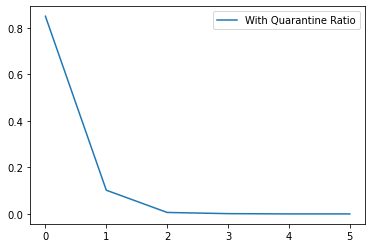

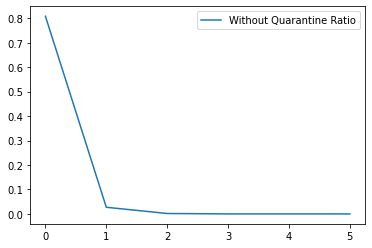

In [21]:
df["Without Quarantine Ratio"] = df["Without Quarantine Coverage"].apply(lambda x: x/14077)
df["With Quarantine Ratio"] = df["With Quarantine Coverage"].apply(lambda x: x/41048)
df.plot(y = "With Quarantine Ratio")
df.plot(y = "Without Quarantine Ratio")

   V1_q Ratio  V1_t Ratio
0    0.799040    0.150289
1    0.557491    0.001408
2    0.354745    0.000000
3    0.103289    0.000000
4    0.091149    0.000000
5    0.000000    0.000000


<AxesSubplot:>

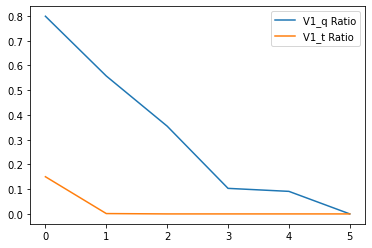

In [31]:
df_sub = df[["V1_q Ratio", "V1_t Ratio"]]
print(df_sub)
df_sub.plot()
#df.plot(y = "V1_q Ratio", "V1_t Ratio")
#df.plot(y = "V1_t Ratio")

<AxesSubplot:>

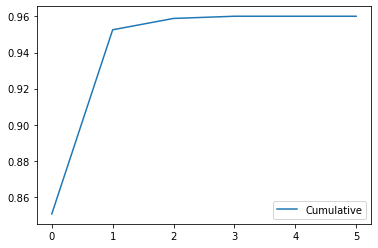

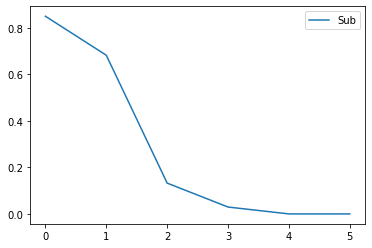

In [39]:
#CUMULATIVE is the total coverage of original V2
#SUB is the coverage of remaining uncovered per timestep

df.loc[0, 'Cumulative'] = df.loc[0, 'With Quarantine Coverage']/41048
df.loc[0, 'Sub'] = df.loc[0, 'With Quarantine Coverage']/41048
cout = 41048
for i in range(1, len(df)):
    df.loc[i, 'Cumulative'] = df.loc[i-1, 'Cumulative'] + df.loc[i, "With Quarantine Coverage"]/(41048)
    cout -= df.loc[i-1, "With Quarantine Coverage"]
    df.loc[i, "Sub"] = df.loc[i, "With Quarantine Coverage"]/( cout)

df.plot(y = "Cumulative")
df.plot(y = "Sub")

<AxesSubplot:>

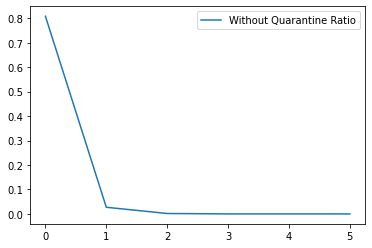

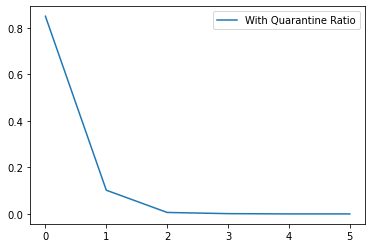

In [32]:
df.plot(y = "Without Quarantine Ratio")
df.plot(y = "With Quarantine Ratio")

In [ ]:
'''for t in range(0, 7):
    print(len(state_t.SIR_known.SIR.I), len(state_t.SIR_real.SIR.I))
    state_t.step(set())'''

In [260]:
print(len(V2_r))
V2_r -= V2_k
tree_timestep = {}
tree_timestep[1] = len(V2_k.intersection(V2_r))
for t in range(1, 10):
    to_quarantine = DepRound(state_t)
    state_t.step(to_quarantine)
    V2_kt = state_t.SIR_known.V2
    V2_tintersect = len(V2_r.intersection(V2_k))
    V2_r -= V2_k
    tree_timestep[t] = [V2_tintersect]

print(len(V2_r))

783
783


In [261]:
print(tree_timestep)

{1: [0], 2: [0], 3: [0], 4: [0], 5: [0], 6: [0], 7: [0], 8: [0], 9: [0]}


In [20]:
G = load_graph("montgomery")
I = set()
with open(PROJECT_ROOT / "data" / "SIR_Cache" / "t7.json", 'r') as infile:
    
    j = json.load(infile)
    (S, infected_queue, R) = (j["S"], j["I_Queue"], j["R"])

    # Make infected_queue a list of sets
    infected_queue = [set(s) for s in infected_queue]
    I = I.union(*infected_queue)
    I = list(I)
    
state = SimulationState(G, (S, I, R), (S, I, R), 2000, 0.078, 1, 0, 0.8, 0.8)

In [21]:
agent = DegGreedy
information_loss_V1 = 0
information_loss_V2 = 0
information_loss_I = 0
while len(state.SIR_real.SIR[1]) != 0:
    to_quarantine = agent(state)
    state.step(to_quarantine)
    
    V1_real = state.SIR_real.V1
    V1_known = state.SIR_known.V1
    V2_real = state.SIR_real.V2
    V2_known = state.SIR_known.V2
    I_real = set(state.SIR_real.SIR.I)
    I_known = set(state.SIR_known.SIR.I)
    
    information_loss_V1 += len(V1_real-V1_known)
    information_loss_V2 += len(V2_real-V2_known)
    information_loss_I += len(I_real-I_known)

print(information_loss_V1, information_loss_V2, information_loss_I)
print(len(set(state.SIR_real.SIR.S) - set(state.SIR_known.SIR.S)))
print(len(set(state.SIR_real.SIR.R) - set(state.SIR_known.SIR.R)))

107200 231438 12624
0
12624


In [ ]:
#INFORMATION LOSS METRIC
#1 Unreachable nodes
#    - S + R (?)
#    - cut edges
#2 Divergence per iteration (summed)
#    - How many drop out of V2 and V1 in find_excluded_contours successively?
#          - Summed over all iterations
#          - Averaged over # of iterations
#    - How they differ from real V2 and V1 in every iteration (summed)
#          - V2_real - V2_known --> how many real that are unknown
#          - V1_real - V1_known
#          - I_real - I_known

#DIVERGENCE FROM REAL
# V1, V2, I
# 0.1: 167755 162232 30147
# 0.7: 133061 224128 16873
# 0.8: 110250 236905 13062
# 0.9: 85265 244965 9806
# 1.0: 0     0      0

In [234]:
df = pd.read_csv(PROJECT_ROOT/"output/run_YmUkc/results.csv")
df = df[['infected_count_real', 'infected_count_known', 'discovery_rate', 'snitch_rate','budget', 'information_loss_V1', 
         'information_loss_V2', 'information_loss_I', 'information_loss_V1_iterative']]
df_graph_low = pd.DataFrame(columns = ['infected_count_real', 'infected_count_known', 'discovery_rate', 'snitch_rate', 'budget', 'information_loss_V1', 
         'information_loss_V2', 'information_loss_I', 'information_loss_V1_iterative'])
df_graph_high = pd.DataFrame(columns = ['infected_count_real', 'infected_count_known', 'discovery_rate', 'snitch_rate', 'budget', 'information_loss_V1', 
         'information_loss_V2', 'information_loss_I', 'information_loss_V1_iterative'])

for t in range(5, 105, 5):
    for j in range(5, 105, 5):
        df_graph_low = pd.concat([df_graph_low, 
                    pd.DataFrame(df[(df['discovery_rate'] == t/100) & (df['snitch_rate']==j/100) &(df['budget']==1000)].mean(axis = 0)).transpose()])
        df_graph_high = pd.concat([df_graph_high, 
                    pd.DataFrame(df[(df['discovery_rate'] == t/100) & (df['snitch_rate']==j/100) &(df['budget']==2000)].mean(axis = 0)).transpose()])
df_graph_low = df_graph_low.round(2)
df_graph_high = df_graph_high.round(2)

<AxesSubplot:xlabel='information_loss_I', ylabel='infected_count_real'>

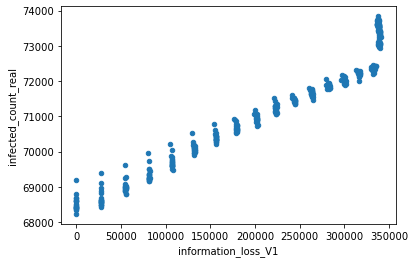

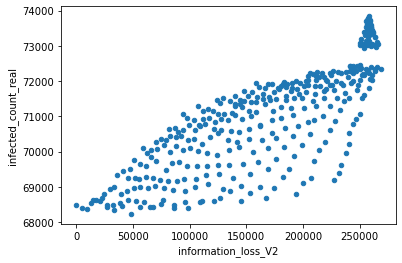

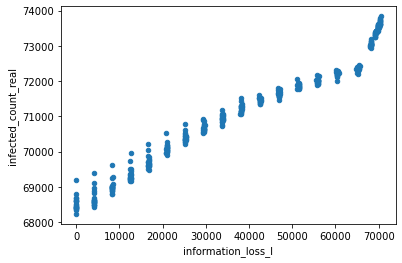

In [250]:
#print(df_graph_low)
df_graph_low.plot.scatter(x = 'information_loss_V1', y='infected_count_real')
#df_graph_high.plot.scatter(x = 'information_loss_V1', y='infected_count_real')
df_graph_low.plot.scatter(x = 'information_loss_V2', y='infected_count_real')
#df_graph_high.plot.scatter(x = 'information_loss_V2', y='infected_count_real')
df_graph_low.plot.scatter(x = 'information_loss_I', y='infected_count_real')
#df_graph_high.plot.scatter(x = 'information_loss_I', y='infected_count_real')

In [238]:
def fun(x, y):
    arr = []
    for i in range(0, len(y)):
        arr.append([])
        for j in range(0, len(x)):
            #print(x[i])
            #print(df_graph_low[(df_graph_low['discovery_rate'] == x[i])])
            #print(x[j], y[i])
            #print((df_graph_low[(df_graph_low['discovery_rate'] == x[i]) & (df_graph_low['snitch_rate'] == y[j])].at[0,'infected_count_real']))
            item = df_graph_low[(df_graph_low['discovery_rate'] == x[j]) & (df_graph_low['snitch_rate'] == y[i])].at[0,'infected_count_real']
            arr[i].append(item)
            #print(arr[i])
    return arr

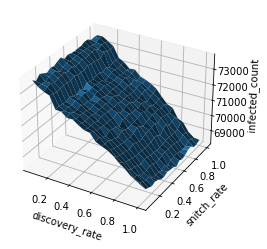

In [239]:


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.round(np.arange(0.05, 1.05, 0.05), decimals = 2)
X, Y = np.meshgrid(x, y)
Z = np.array(fun(x, y))
           
ax.set_xlabel('discovery_rate')
ax.set_ylabel('snitch_rate')
ax.set_zlabel('infected_count')
ax.plot_surface(X, Y, Z)
    

plt.show()

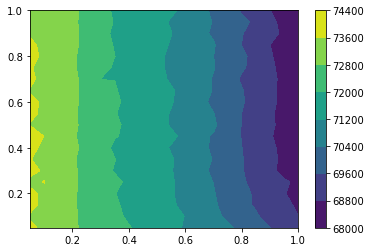

In [179]:
fig,ax = plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp)
plt.show()

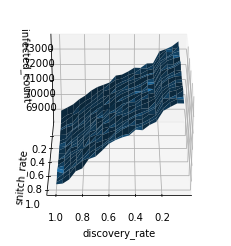

In [160]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
ax.set_xlabel('discovery_rate')
ax.set_ylabel('snitch_rate')
ax.set_zlabel('infected_count')
ax.view_init(30, 90)
plt.show()

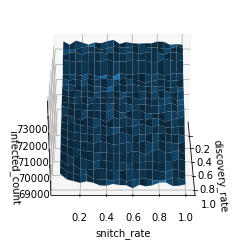

In [162]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
ax.set_xlabel('discovery_rate')
ax.set_ylabel('snitch_rate')
ax.set_zlabel('infected_count')
ax.view_init(30, 0)
plt.show()

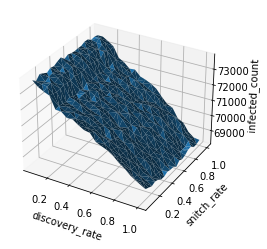

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_trisurf(df_graph_low.discovery_rate, df_graph_low.snitch_rate, df_graph_low.infected_count_real, linewidth=0.2)
ax.set_xlabel('discovery_rate')
ax.set_ylabel('snitch_rate')
ax.set_zlabel('infected_count')
plt.show()

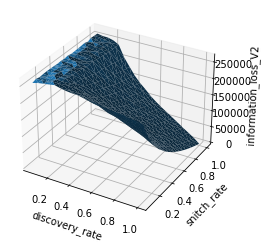

In [134]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_trisurf(df_graph_low.discovery_rate, df_graph_low.snitch_rate, df_graph_low.information_loss_V2, linewidth=0.2)
ax.set_xlabel('discovery_rate')
ax.set_ylabel('snitch_rate')
ax.set_zlabel('information_loss_V2')
plt.show()

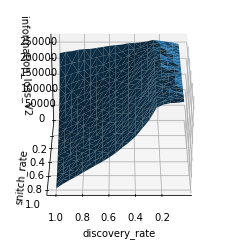

In [163]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(df_graph_low.discovery_rate, df_graph_low.snitch_rate, df_graph_low.information_loss_V2, linewidth=0.2)
ax.set_xlabel('discovery_rate')
ax.set_ylabel('snitch_rate')
ax.set_zlabel('information_loss_V2')
ax.view_init(30, 90)
plt.show()

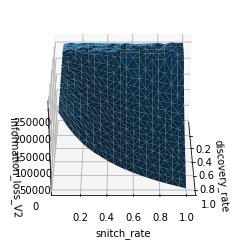

In [165]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(df_graph_low.discovery_rate, df_graph_low.snitch_rate, df_graph_low.information_loss_V2, linewidth=0.2)
ax.set_xlabel('discovery_rate')
ax.set_ylabel('snitch_rate')
ax.set_zlabel('information_loss_V2')
ax.view_init(30, 0)
plt.show()

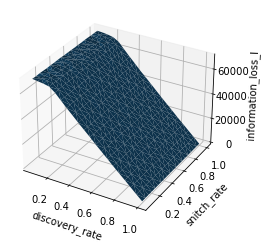

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_trisurf(df_graph_low.discovery_rate, df_graph_low.snitch_rate, df_graph_low.information_loss_I, linewidth=0.2)
ax.set_xlabel('discovery_rate')
ax.set_ylabel('snitch_rate')
ax.set_zlabel('information_loss_I')
plt.show()

In [240]:
def fun_I(x, y):
    arr = []
    for i in range(0, len(y)):
        arr.append([])
        for j in range(0, len(x)):
            #print(x[i])
            #print(df_graph_low[(df_graph_low['discovery_rate'] == x[i])])
            #print((df_graph_low[(df_graph_low['discovery_rate'] == x[i]) & (df_graph_low['snitch_rate'] == y[j])].at[0,'infected_count_real']))
            item = df_graph_low[(df_graph_low['discovery_rate'] == x[j]) & (df_graph_low['snitch_rate'] == y[i])].at[0,'information_loss_V2']
            arr[i].append(item)
            #print(arr[i])
    return arr

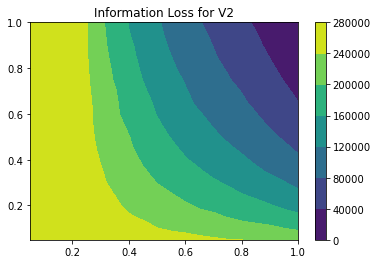

In [247]:
x = y = np.round(np.arange(0.05, 1.05, 0.05), decimals = 2)
X, Y = np.meshgrid(x, y)
Z = np.array(fun_I(x, y))

fig,ax = plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp)
plt.title("Information Loss for V2")
plt.show()

In [41]:
G = load_graph("montgomery")

I = set()
with open(PROJECT_ROOT / "data" / "SIR_Cache" / "t7.json", 'r') as infile:
    
    j = json.load(infile)
    (S, infected_queue, R) = (j["S"], j["I_Queue"], j["R"])

    # Make infected_queue a list of sets
    infected_queue = [set(s) for s in infected_queue]
    I = I.union(*infected_queue)
    I = list(I)


In [94]:
G = load_graph("montgomery")
infected_size = 10
G_node = len(G.nodes)
nodeList = list(G.nodes)
I = {nodeList.index(random.randint(0, G_node-1)) for i in range(0, infected_size)}
S = set(G.nodes) - I
state = SimulationState(G, (list(S), list(I), []), (list(S), list(I), []), 1000, (0.10, 0.075, 0.05), (0.04, 0.4, 1.0), 0, 1, 0, 1, 1)

In [48]:
state = SimulationState(G, (S, I, R), (S, I, R), 1000, (0.10, 0.075, 0.05), (0.04, 0.4, 1.0), 0, 1, 0, 1, 1)

In [95]:
infections = []
total = []
total = []
early_i = []
middle_i = []
late_i = []
early_t = []
middle_t = []
late_t=[]
step = 0
while(len(state.SIR_real.SIR[1]) != 0):
    if(state.SIR_real.time_stage == 0):
        early_i.append(len(state.SIR_real.SIR[1]))
        early_t.append(len(state.SIR_real.SIR[2]))
    elif (state.SIR_real.time_stage == 1):
        middle_i.append(len(state.SIR_real.SIR[1]))
        middle_t.append(len(state.SIR_real.SIR[2]))
    else:
        late_i.append(len(state.SIR_real.SIR[1]))
        late_t.append(len(state.SIR_real.SIR[2]))
    infections.append(len(state.SIR_real.SIR[1]))
    total.append(len(state.SIR_real.SIR[2]))
    
    dictD = {}
    dictD["S"] = state.SIR_real.SIR[0]
    dictD["I"] = state.SIR_real.SIR[1]
    dictD["R"] = state.SIR_real.SIR[2]
    dictD["early_infected"] = early_i
    dictD["middle_infected"] = middle_i
    dictD["late_infected"] = late_i
    dictD["time_stage"] = state.SIR_real.time_stage
    filename = "z" + str(step+1) + ".json"
    with open(PROJECT_ROOT / "data" / "SIR_Cache"/filename, 'w') as outfile:
        json.dump(dictD, outfile)
    
    state.step(set())
    step+=1
    #print(state.SIR_real.time_stage)
    #if (step >= 6):
    #    to_quarantine = DegGreedy(state)
    #    state.step(to_quarantine)
    #step += 1
    #state.step(set())
infections.append(0)
#late_i.append(len(state.SIR_real.SIR[1]))

In [96]:
late_i.append(len(state.SIR_real.SIR[1]))
dictD = {}
dictD["S"] = state.SIR_real.SIR[0]
dictD["I"] = state.SIR_real.SIR[1]
dictD["R"] = state.SIR_real.SIR[2]
dictD["early_infected"] = early_i
dictD["middle_infected"] = middle_i
dictD["late_infected"] = late_i
dictD["time_stage"] = state.SIR_real.time_stage
with open(PROJECT_ROOT / "data" / "SIR_Cache"/"z20.json", 'w') as outfile:
    json.dump(dictD, outfile)

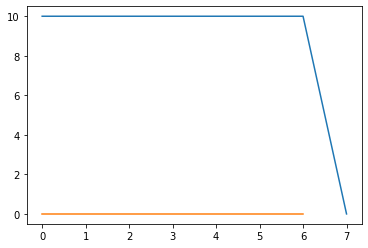

In [53]:
plt.plot(infections)
plt.plot(total)

1 9 1


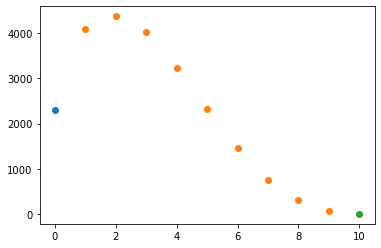

In [45]:
print(len(early_i), len(middle_i), len(late_i))
#print(len([i for i in range(len(early_i)-1, len(middle_i) + len(early_i)-1)]))
plt.scatter([i for i in range(len(early_i))], early_i)
plt.scatter([i for i in range(len(early_i), len(middle_i) + len(early_i))], middle_i)
plt.scatter([i for i in range(len(middle_i) + len(early_i), len(middle_i) + len(early_i) +len(late_i))], late_i)
#print(len(early_i), len(middle_i), len(late_i))
#print((0.10, 0.075, 0.05), (0.10, 0.30, 1.0))

1 9 0
(0.1, 0.075, 0.05) (0.1, 0.3, 1.0)


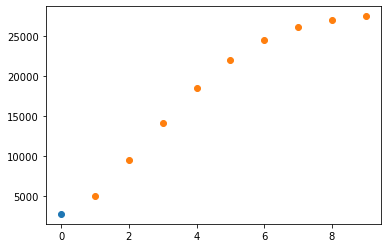

In [46]:
print(len(early_t), len(middle_t), len(late_t))
#print(len([i for i in range(len(early_i)-1, len(middle_i) + len(early_i)-1)]))
plt.scatter([i for i in range(len(early_t))], early_t)
plt.scatter([i for i in range(len(early_t), len(middle_t) + len(early_t))], middle_t)
plt.scatter([i for i in range(len(middle_t) + len(early_t), len(middle_t) + len(early_t) +len(late_t))], late_t)
#print(len(early_i), len(middle_i), len(late_i))
print((0.10, 0.075, 0.05), (0.10, 0.30, 1.0))

2 3 11


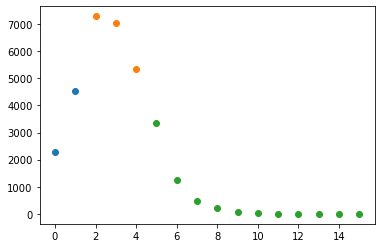

In [130]:
print(len(early_i), len(middle_i), len(late_i))
#print(len([i for i in range(len(early_i)-1, len(middle_i) + len(early_i)-1)]))
plt.scatter([i for i in range(len(early_i))], early_i)
plt.scatter([i for i in range(len(early_i), len(middle_i) + len(early_i))], middle_i)
plt.scatter([i for i in range(len(middle_i) + len(early_i), len(middle_i) + len(early_i) +len(late_i))], late_i)
#print(len(early_i), len(middle_i), len(late_i))


2 3 10
(0.1, 0.075, 0.05) (0.1, 0.35, 1.0)


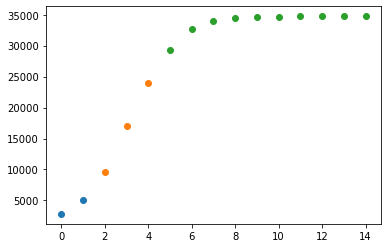

In [131]:
print(len(early_t), len(middle_t), len(late_t))
#print(len([i for i in range(len(early_i)-1, len(middle_i) + len(early_i)-1)]))
plt.scatter([i for i in range(len(early_t))], early_t)
plt.scatter([i for i in range(len(early_t), len(middle_t) + len(early_t))], middle_t)
plt.scatter([i for i in range(len(middle_t) + len(early_t), len(middle_t) + len(early_t) +len(late_t))], late_t)
#print(len(early_i), len(middle_i), len(late_i))
print((0.10, 0.075, 0.05), (0.10, 0.35, 1.0))